In [49]:
import pyreadr
import pandas as pd
import numpy as np

In [50]:
df = pyreadr.read_r('./data/gss16.rda')
gss16_data = df['gss16']

In [51]:
gss16_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   harass5   1469 non-null   object 
 1   emailmin  1649 non-null   float64
 2   emailhr   1649 non-null   float64
 3   educ      2858 non-null   float64
 4   polviews  2756 non-null   object 
 5   advfront  1385 non-null   object 
 6   snapchat  1372 non-null   object 
 7   instagrm  1372 non-null   object 
 8   wrkstat   2864 non-null   object 
dtypes: float64(3), object(6)
memory usage: 201.7+ KB


In [52]:
gss16_data.head()

,harass5,emailmin,emailhr,educ,polviews,advfront,snapchat,instagrm,wrkstat
0,NaN,0.0,12.0,16.0,Moderate,Strongly agree,NaN,NaN,Working fulltime
1,NaN,30.0,0.0,12.0,Liberal,Disagree,No,No,Working fulltime
2,No,NaN,NaN,16.0,Conservative,NaN,No,No,Retired
3,NaN,10.0,0.0,12.0,Moderate,Disagree,NaN,NaN,Working parttime
4,No,NaN,NaN,18.0,Slightly liberal,NaN,Yes,Yes,Working parttime


In [53]:
gss16_data.dropna(subset=['emailmin', 'emailhr'], inplace=True)
gss16_data['educ'].fillna(gss16_data['educ'].mean(), inplace = True)

In [54]:
col_num = ['emailmin', 'emailhr', 'educ']
col_cat = ['harass5', 'polviews', 'advfront', 'snapchat', 'instagrm', 'wrkstat']

In [55]:
df_cat = gss16_data[gss16_data.columns.intersection(col_cat)]
df_num = gss16_data[gss16_data.columns.intersection(col_num)]
df_cat_fill = df_cat.fillna('unknown')

In [56]:
print(f'cat na: {df_cat.isna().sum()}')
print(f'cat fill na: {df_cat_fill.isna().sum()}')

cat na: harass5     1218
polviews      55
advfront     433
snapchat     969
instagrm     969
wrkstat        1
dtype: int64
cat fill na: harass5     0
polviews    0
advfront    0
snapchat    0
instagrm    0
wrkstat     0
dtype: int64


In [57]:
print(df_cat.info())
print(df_num.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2865
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   harass5   431 non-null    object
 1   polviews  1594 non-null   object
 2   advfront  1216 non-null   object
 3   snapchat  680 non-null    object
 4   instagrm  680 non-null    object
 5   wrkstat   1648 non-null   object
dtypes: object(6)
memory usage: 90.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2865
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   emailmin  1649 non-null   float64
 1   emailhr   1649 non-null   float64
 2   educ      1649 non-null   float64
dtypes: float64(3)
memory usage: 51.5 KB
None


In [58]:
df_num['email_time'] = df_num['emailhr'] * 60 + df_num['emailmin']

max_email_time = df_num['email_time'].max()
min_email_time = df_num['email_time'].min()
df_num['email_time_center'] = (df_num['email_time'] - min_email_time) / (max_email_time - min_email_time)

/tmp/ipykernel_17717/1697783655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['email_time'] = df_num['emailhr'] * 60 + df_num['emailmin']
/tmp/ipykernel_17717/1697783655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['email_time_center'] = (df_num['email_time'] - min_email_time) / (max_email_time - min_email_time)


In [59]:
df_num['email_time_center']

0       0.120000
1       0.005000
3       0.001667
5       0.020000
6       0.400000
          ...   
2860    0.010000
2862    0.200000
2863    0.020000
2864    0.000000
2865    0.010000
Name: email_time_center, Length: 1649, dtype: float64

In [60]:
max_educ = df_num['educ'].max()
min_educ = df_num['educ'].min()
df_num['educ_center'] = (df_num['educ'] - min_educ) / (max_educ - min_educ)

/tmp/ipykernel_17717/2774885650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['educ_center'] = (df_num['educ'] - min_educ) / (max_educ - min_educ)


In [61]:
df_num['educ_center']

0       0.777778
1       0.555556
3       0.555556
5       0.666667
6       0.666667
          ...   
2860    0.611111
2862    1.000000
2863    0.722222
2864    0.666667
2865    0.666667
Name: educ_center, Length: 1649, dtype: float64

In [62]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2865
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   emailmin           1649 non-null   float64
 1   emailhr            1649 non-null   float64
 2   educ               1649 non-null   float64
 3   email_time         1649 non-null   float64
 4   email_time_center  1649 non-null   float64
 5   educ_center        1649 non-null   float64
dtypes: float64(6)
memory usage: 90.2 KB


In [63]:
df_num.to_csv('./data/preprocessing/gss16_number_columns', index=False)

In [64]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

In [65]:
# enc = OneHotEncoder(handle_unknown='ignore')

In [66]:
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [67]:
# df_trans = ohe.fit_transform(gss16_data[['harass5', 'polviews', 'advfront', 'snapchat', 'instagrm', 'wrkstat']])

In [68]:
# ohe.categories_

In [69]:
# np.argwhere(np.isnan(df_trans))

In [70]:
df_cat_dum = pd.get_dummies(df_cat, dtype=int)
df_cat_fill_dum = pd.get_dummies(df_cat_fill, dtype=int)

In [71]:
df_cat_dum.head()

,harass5_Does not apply (i do not have a job/superior/co-worker),harass5_No,harass5_Yes,polviews_Conservative,polviews_Extremely liberal,polviews_Extrmly conservative,polviews_Liberal,polviews_Moderate,polviews_Slghtly conservative,polviews_Slightly liberal,...,instagrm_No,instagrm_Yes,wrkstat_Keeping house,wrkstat_Other,wrkstat_Retired,wrkstat_School,wrkstat_Temp not working,"wrkstat_Unempl, laid off",wrkstat_Working fulltime,wrkstat_Working parttime
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [72]:
df_cat_dum.to_csv('./data/preprocessing/gss16_dummies_column', index=False)
df_cat_fill_dum.to_csv('./data/preprocessing/gss16_dummies_column_fillna', index=False)

In [73]:
X = pd.concat([df_num['educ_center'], df_cat_dum], axis=1)
X_fill = pd.concat([df_num['educ_center'], df_cat_fill_dum], axis=1)
y = df_num['email_time_center']

In [74]:
X.head()

,educ_center,harass5_Does not apply (i do not have a job/superior/co-worker),harass5_No,harass5_Yes,polviews_Conservative,polviews_Extremely liberal,polviews_Extrmly conservative,polviews_Liberal,polviews_Moderate,polviews_Slghtly conservative,...,instagrm_No,instagrm_Yes,wrkstat_Keeping house,wrkstat_Other,wrkstat_Retired,wrkstat_School,wrkstat_Temp not working,"wrkstat_Unempl, laid off",wrkstat_Working fulltime,wrkstat_Working parttime
0,0.777778,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.555556,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0.555556,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0.666667,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
6,0.666667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
X.to_csv('./data/preprocessing/X.csv', index=False)
X_fill.to_csv('./data/preprocessing/X_fill.csv', index=False)
y.to_csv('./data/preprocessing/y.csv', index=False)

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_fill, y, test_size=0.2, random_state=42)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 1009 to 1968
Data columns (total 34 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   educ_center                                                      1319 non-null   float64
 1   harass5_Does not apply (i do not have a job/superior/co-worker)  1319 non-null   int64  
 2   harass5_No                                                       1319 non-null   int64  
 3   harass5_Yes                                                      1319 non-null   int64  
 4   harass5_unknown                                                  1319 non-null   int64  
 5   polviews_Conservative                                            1319 non-null   int64  
 6   polviews_Extremely liberal                                       1319 non-null   int64  
 7   polviews_Extrmly conservative               

In [78]:
X_train.head()

,educ_center,harass5_Does not apply (i do not have a job/superior/co-worker),harass5_No,harass5_Yes,harass5_unknown,polviews_Conservative,polviews_Extremely liberal,polviews_Extrmly conservative,polviews_Liberal,polviews_Moderate,...,instagrm_unknown,wrkstat_Keeping house,wrkstat_Other,wrkstat_Retired,wrkstat_School,wrkstat_Temp not working,"wrkstat_Unempl, laid off",wrkstat_Working fulltime,wrkstat_Working parttime,wrkstat_unknown
1009,1.000000,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
123,0.555556,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2061,0.611111,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2855,0.722222,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2544,0.722222,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [79]:
y_train.head()

1009    0.0500
123     0.5000
2061    0.0100
2855    0.0500
2544    0.0025
Name: email_time_center, dtype: float64

<Axes: >

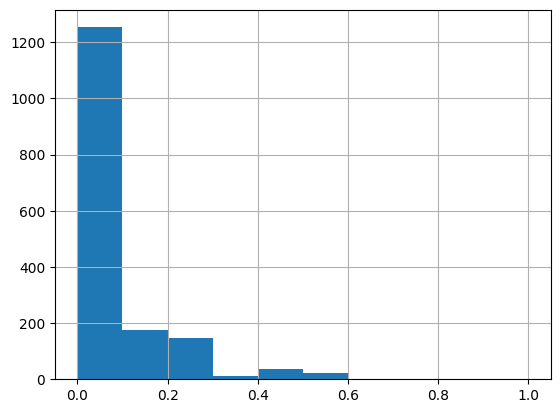

In [80]:
y.hist()

In [81]:
import statsmodels.api as sm

gamma_model = sm.GLM(y_train, X_train, family=sm.families.Gamma())

/home/linhnm/msc_code/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [82]:
gamma_results = gamma_model.fit(method='lbfgs')

/home/linhnm/msc_code/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/home/linhnm/msc_code/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [83]:
gamma_results.summary()

/home/linhnm/msc_code/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1806: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      email_time_center   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1291
Model Family:                   Gamma   Df Model:                           27
Link Function:           InversePower   Scale:                          3.0014
Method:                         lbfgs   Log-Likelihood:                    inf
Date:                Mon, 14 Aug 2023   Deviance:                       14589.
Time:                        19:02:05   Pearson chi2:                 3.87e+03
No. Iterations:                    39   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
educ_center                                                       -24.5023      3.358     -7.296      0.000     -31.084     -17.920
harass5_Does not apply (i do not have a job/superior/co-worker)     0.3797        nan        nan        nan         nan         nan
harass5_No                                                        -38.8962        nan        nan        nan         nan         nan
harass5_Yes                                                       -47.5030   1.63e+07  -2.91e-06      1.000    -3.2e+07     3.2e+07
harass5_unknown                                                    74.2057   2.11e+06   3.52e-05      1.000   -4.13e+06    4.13e+06
polviews_Conservative                                              -1.4503   5.09e+07  -2.85e-08      1.000   -9.99e+07    9.99e+07
polviews_Extremely liberal                                          0.0506   5.25e+07   9.64e-10      1.000   -1.03e+08    1.03e+08
polviews_Extrmly conservative                                      13.8369   5.09e+07   2.72e-07      1.000   -9.99e+07    9.99e+07
polviews_Liberal                                                   -0.8138   5.65e+07  -1.44e-08      1.000   -1.11e+08    1.11e+08
polviews_Moderate                                                  -3.6065   5.16e+07  -6.99e-08      1.000   -1.01e+08    1.01e+08
polviews_Slghtly conservative                                      -1.6553   5.31e+07  -3.12e-08      1.000   -1.04e+08    1.04e+08
polviews_Slightly liberal                                          -4.6101      6e+07  -7.69e-08      1.000   -1.18e+08    1.18e+08
polviews_unknown                                                  -13.5655   5.54e+07  -2.45e-07      1.000   -1.09e+08    1.09e+08
advfront_Agree                                                    -23.1412        nan        nan        nan         nan         nan
advfront_Disagree                                                 -24.8433    1.8e+07  -1.38e-06      1.000   -3.52e+07    3.52e+07
advfront_Dont know                                                 -2.6510        nan        nan        nan         nan         nan
advfront_Strongly agree                                           -23.1904        nan        nan        nan         nan         nan
advfront_Strongly disagree                                        -29.6816        nan        nan        nan         nan         nan
advfront_unknown                                                   91.6936   8.99e+06   1.02e-05      1.000   -1.76e+07    1.76e+07
snapchat_No                                                        -2.1720   1.54e+07  -1.41e-07      1.000   -3.03e+07    3.03e+07
snapchat_Yes                                   

In [84]:
y_pred = gamma_results.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(f'mse: {mse}')

mse: 0.015428270183396176


<Axes: >

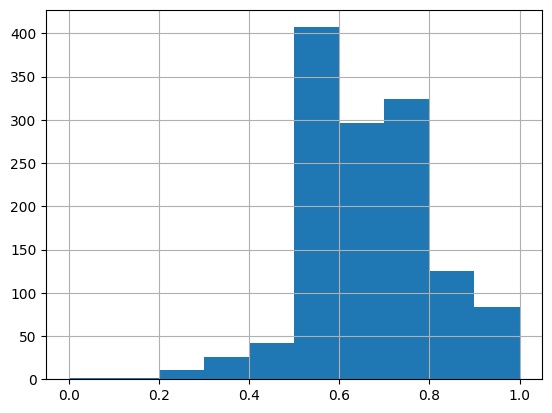

In [86]:
X_train['educ_center'].hist()

In [87]:
import statsmodels as stm
link_function = stm.genmod.families.links.Log()
X_prune_train = pd.DataFrame(X_train[['educ_center', 'polviews_Conservative', 'polviews_Extremely liberal', 'polviews_Extrmly conservative', 'polviews_Liberal', 'polviews_Moderate']])
X_prune_test = pd.DataFrame(X_test[['educ_center', 'polviews_Conservative', 'polviews_Extremely liberal', 'polviews_Extrmly conservative', 'polviews_Liberal', 'polviews_Moderate']])
prune_model = sm.GLM(y_train, X_prune_train, family=sm.families.Gamma(link=link_function))
res = prune_model.fit_regularized(method='elastic_net', alpha=0, opt_method='bfgs')

/home/linhnm/msc_code/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/home/linhnm/msc_code/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1379: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


In [88]:
# res.

In [89]:
y_prune_pred = res.predict(pd.DataFrame(X_prune_test))

mse = mean_squared_error(y_test, y_prune_pred)

print(f'mse: {mse}')

mse: 0.02145982745969953


In [90]:
# res.predict(0.5555555555555556)

In [91]:
import matplotlib.pyplot as plt

In [92]:
# y_test_log = np.log(y_test)
# y_pred_log = np.log(res.predict(pd.DataFrame(X_test['educ_center'])))

In [93]:
# fig, ax = plt.subplots()

# ax.plot(X_test['educ_center'], y_test_log, 'bo')

In [94]:
# y_values = [(y_test.iloc[i], y_prune_pred.iloc[i]) for i in range(len(y_test))]

# y_log_values = np.log(y_values)

# y_log_values = y_log_values.tolist()

# y_log_values

In [95]:
# xData = []
# yData = []
# cols = []
# for counter, name in enumerate(X_test['educ_center']):
#     #Decide which point gets which color
#     if (y_values[counter][0] > y_values[counter][1]):
#         cols += ['r', 'g']
#     elif (y_values[counter][0] < y_values[counter][1]):
#         cols += ['g', 'r']
#     else:
#         cols += ['b', 'b']

#     #adding names and values to the data for x and y Axes    
#     xData += [name, name]
#     yData += y_values[counter]


# myplot = plt.scatter(xData, yData, color=cols)

# plt.show()

In [96]:
# xData = []
# yData = []
# cols = []
# for counter, name in enumerate(X_test['educ_center']):
#     #Decide which point gets which color
#     if (y_log_values[counter][0] > y_log_values[counter][1]):
#         cols += ['r', 'g']
#     elif (y_log_values[counter][0] < y_log_values[counter][1]):
#         cols += ['g', 'r']
#     else:
#         cols += ['b', 'b']

#     #adding names and values to the data for x and y Axes    
#     xData += [name, name]
#     yData += y_log_values[counter]


# myplot = plt.scatter(xData, yData, color=cols)

# plt.show()